## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from matplotlib and seaborn)

%matplotlib inline

# Model building libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## Loading The Data

> Let's understand our data

In [2]:
# Reading the data into pandas data frame 
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## EDA 

> Let's visualize our data for better understanding 

,Exited,Count,Male,Female
0,0,7963,4559,3404
1,1,2037,898,1139


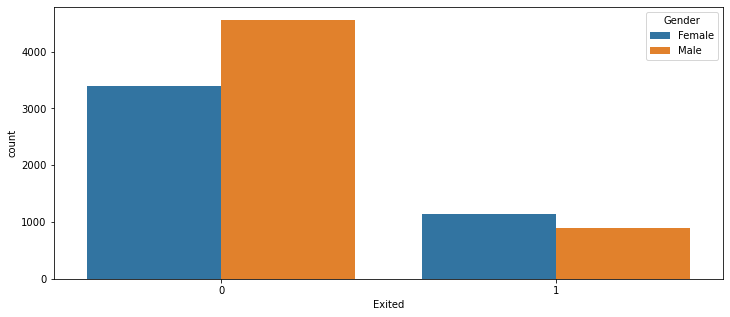

In [6]:
# Finding Relation between Exited and Gender
# Creating frequency table
freq_table = df.groupby(['Exited']).size().reset_index(name='Count')
freq_table['Male'] = freq_table['Exited'].apply(lambda x : df['Exited'][(df['Exited'] == x) & (df['Gender'] == 'Male')].count())
freq_table['Female'] = freq_table['Exited'].apply(lambda x : df['Exited'][(df['Exited'] == x) & (df['Gender'] == 'Female')].count())

plt.figure(figsize=(12, 5))
sns.countplot(x='Exited', data=df, hue='Gender')
freq_table

,Geography,Count,0,1
0,France,5014,4204,810
1,Germany,2509,1695,814
2,Spain,2477,2064,413


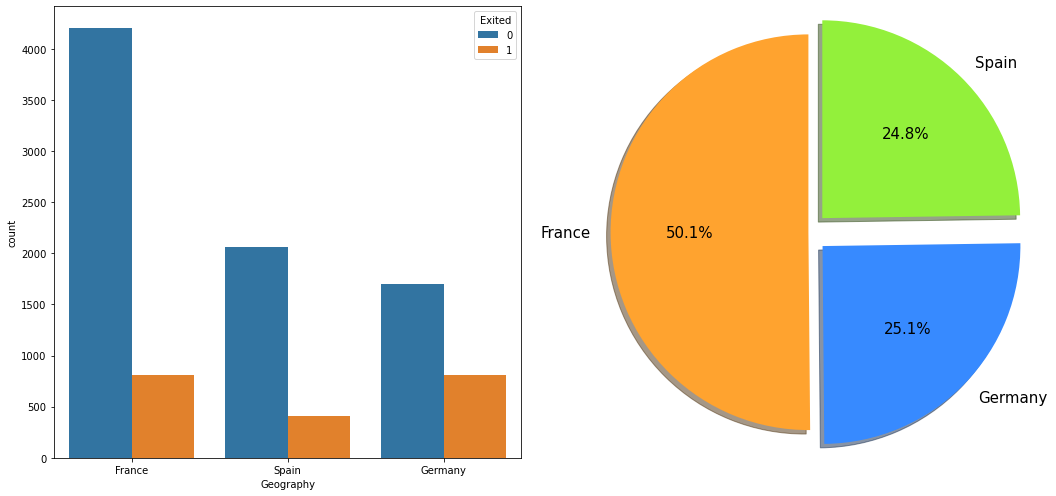

In [7]:
# Creating frequency table 
freq_table = df.groupby(['Geography']).size().reset_index(name='Count')
freq_table['0'] = freq_table['Geography'].apply(lambda x : df['Geography'][(df['Geography'] == x) & (df['Exited'] == 0)].count())
freq_table['1'] = freq_table['Geography'].apply(lambda x : df['Geography'][(df['Geography'] == x) & (df['Exited'] == 1)].count())

# Initializing lables and sizes for the pie chart 
labels = ['France', 'Germany', 'Spain']  # names on pie chart 
sizes = [df['Geography'][df['Geography'] == 'France'].count(),df['Geography'][df['Geography'] == 'Germany'].count(), df['Geography'][df['Geography'] == 'Spain'].count()]  
# only "explode" the 2nd and 3rd slice (i.e. 'France', 'Germany')
explode = (0, 0.1, 0.1)
#add colors   
colors = ['#FFA32F','#378AFF', '#93F03B'] 

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.countplot(x='Geography', data=df, hue='Exited', ax=ax[0])
# Equal aspect ratio ensures that pie is drawn as a circle
ax[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 15, 'fontWeight':'500'})
ax[1].axis('equal')
plt.tight_layout()
freq_table 

<AxesSubplot:xlabel='Geography', ylabel='count'>

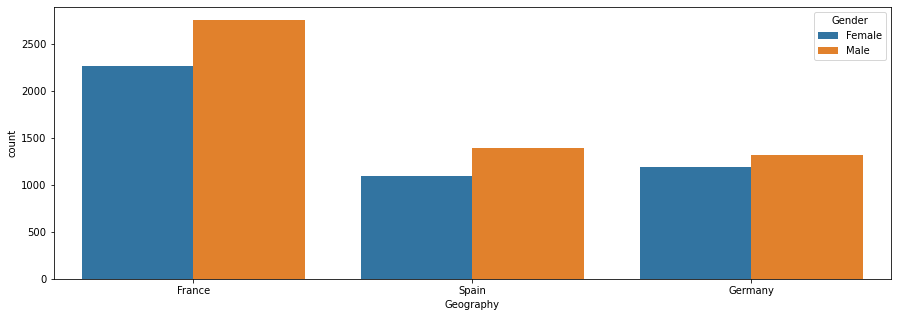

In [8]:
# Relation between Geography and Gender
plt.figure(figsize=(15, 5))
sns.countplot(x='Geography', data=df, hue='Gender')

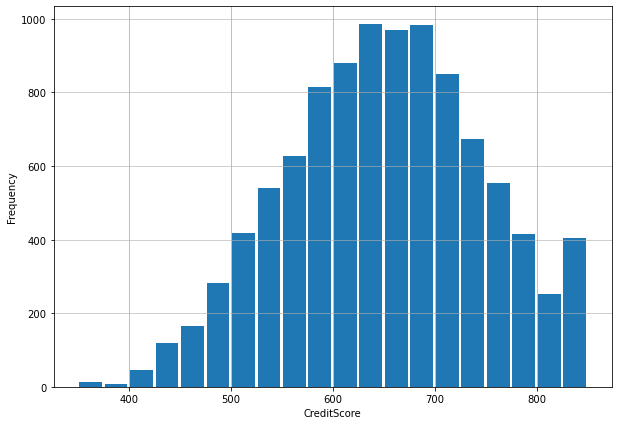

In [9]:
plt.figure(figsize=(10, 7))
df.CreditScore.plot.hist(grid=True, bins=20, rwidth=0.9)
plt.xlabel('CreditScore')
plt.grid(axis='y', alpha=0.75)

The smallest age is 18 and the largest is 92


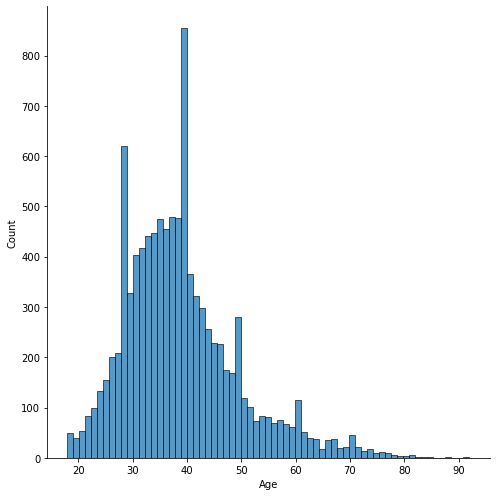

In [10]:
# The majority of people taking loan are between 30 - 40 years old 
print('The smallest age is {} and the largest is {}'.format(df.Age.min(), df.Age.max()))
sns.displot(df.Age, height=7)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

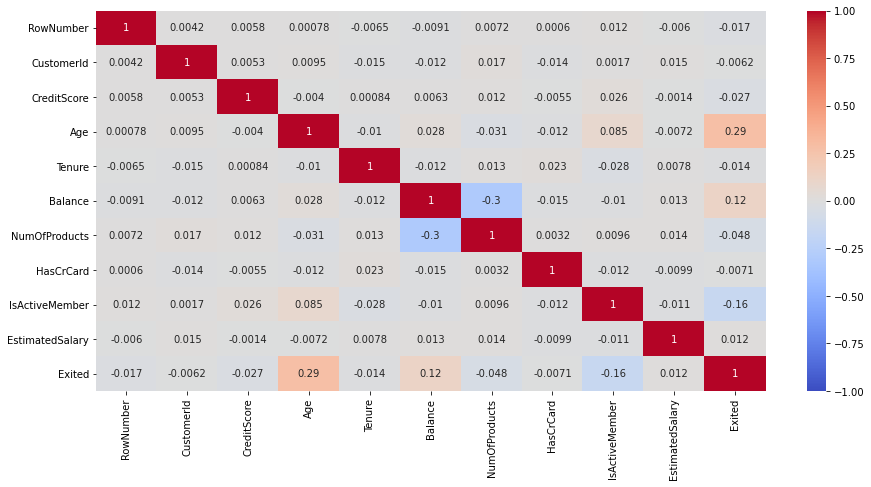

In [11]:
# Corr heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
df.corr().Exited.sort_values(ascending=False)

## Data Preprocessing 

> Now Let's preprocess our data to be ready for the model

In [12]:
# One hot encoding Geography and Gender features 
geo = pd.get_dummies(df.Geography, drop_first=True)
gender = pd.get_dummies(df.Gender, drop_first=True)
df = pd.concat([geo, gender, df], axis=1)

In [13]:
df.head()

,Germany,Spain,Male,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Drop unnecessary features 
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

In [15]:
df.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
# Spiliting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Building Model

> We will build an ANN using Keras 

In [18]:
model = Sequential() #initialize model object

model.add(Dense(32, activation='relu', kernel_initializer='normal', input_dim=11))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='normal')) 

# Compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [19]:
# Fitting the model
model.fit(X_train, y_train, batch_size = 20, epochs = 150)

Epoch 1/150
8000/8000 [==============================] - 1s 116us/step - loss: 0.4754 - accuracy: 0.7933
Epoch 2/150
8000/8000 [==============================] - 1s 78us/step - loss: 0.4173 - accuracy: 0.8238
Epoch 3/150
8000/8000 [==============================] - 1s 84us/step - loss: 0.3907 - accuracy: 0.8375
Epoch 4/150
8000/8000 [==============================] - 1s 86us/step - loss: 0.3738 - accuracy: 0.8482
Epoch 5/150
8000/8000 [==============================] - 1s 85us/step - loss: 0.3625 - accuracy: 0.8487
Epoch 6/150
8000/8000 [==============================] - 1s 88us/step - loss: 0.3494 - accuracy: 0.8554
Epoch 7/150
8000/8000 [==============================] - 1s 84us/step - loss: 0.3445 - accuracy: 0.8594
Epoch 8/150
8000/8000 [==============================] - 1s 83us/step - loss: 0.3403 - accuracy: 0.8590
Epoch 9/150
8000/8000 [==============================] - 1s 81us/step - loss: 0.3403 - accuracy: 0.8606
Epoch 10/150
8000/8000 [==============================] - 1s 81

8000/8000 [==============================] - 1s 79us/step - loss: 0.2948 - accuracy: 0.8771
Epoch 80/150
8000/8000 [==============================] - 1s 80us/step - loss: 0.2962 - accuracy: 0.8752
Epoch 81/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2939 - accuracy: 0.8781
Epoch 82/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2927 - accuracy: 0.8800
Epoch 83/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2935 - accuracy: 0.8780
Epoch 84/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2919 - accuracy: 0.8783
Epoch 85/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2926 - accuracy: 0.8780 0s - loss: 0.283
Epoch 86/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2919 - accuracy: 0.8780
Epoch 87/150
8000/8000 [==============================] - 1s 79us/step - loss: 0.2937 - accuracy: 0.8760
Epoch 88/150
8000/8000 [===========================

In [20]:
# Predicting the test set
prediction = model.predict(X_test)
prediction = (prediction > 0.5)

In [21]:
#86.15%
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy: {}% \n'.format(accuracy_score(y_test, prediction)* 100)) # Calculating accuracy 
print('*'*100)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction)) 

Accuracy: 86.0% 

****************************************************************************************************
[[1522   85]
 [ 195  198]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

